In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
X = iris.data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [5]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

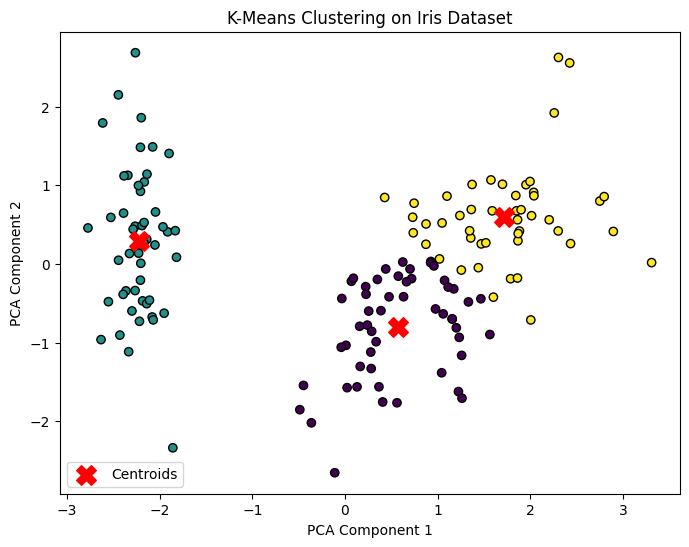

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

In [8]:
for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')

Cluster 0: 53 points
Cluster 1: 50 points
Cluster 2: 47 points


kmeans clustering using Elbow Method

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
inertia = []
k_values = range(1, 11)

for k in k_values:
       kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
       kmeans.fit(X_scaled)
       inertia.append(kmeans.inertia_)

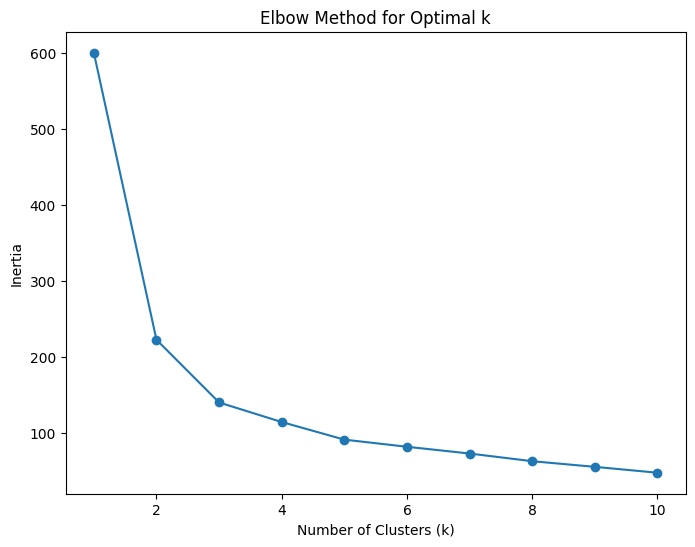

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans clustering with load_digits dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
iris = load_digits()
X = iris.data

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [17]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

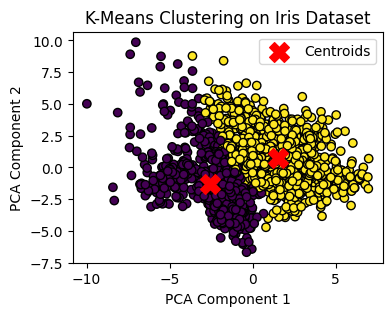

In [19]:
plt.figure(figsize=(4, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

In [20]:
for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')

Cluster 0: 675 points
Cluster 1: 1122 points


Compare K-Means with DBSCAN

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [24]:
num_clusters_kmeans = len(set(kmeans.labels_))
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters (KMeans): {num_clusters_kmeans}")
print(f"Number of clusters (DBSCAN): {num_clusters_dbscan}")

Number of clusters (KMeans): 2
Number of clusters (DBSCAN): 0
